In [1]:
# Dataframes
import pandas as pd

In [2]:
# Load the text data
data =pd.read_csv("/home/users/mhossain/projects/cards/fit/roberta/model_label_claim.csv")
print('{} paragraphs were loaded. Here are the first few rows of the data:'.format(len(data)))
data.head()

13991 paragraphs were loaded. Here are the first few rows of the data:


,pub_text,text_denoised,RoBERTa_pred_label,Mapped_Claim
0,Because the climate is also effected by natura...,climate also effected natural effect like sola...,7,It is natural cycles/variation
1,I was reading an article earlier about a team ...,reading article earlier team australia able sp...,10,Species/plants/reefs are not showing climate i...
2,"Renewables are a mix, wind remains on par or b...",renewables mix wind remains par nuclear data p...,14,Clean energy technology/biofuels won’t work
3,&gt; economic growth has been decoupled from r...,gt economic growth decoupled rising carbon emi...,12,Climate policies (mitigation or adaptation) ar...
4,Windfarms and solar are the most effective ove...,windfarms solar effective large area case spac...,14,Clean energy technology/biofuels won’t work


In [3]:
data = data.drop(columns='RoBERTa_pred_label')
data

,pub_text,text_denoised,Mapped_Claim
0,Because the climate is also effected by natura...,climate also effected natural effect like sola...,It is natural cycles/variation
1,I was reading an article earlier about a team ...,reading article earlier team australia able sp...,Species/plants/reefs are not showing climate i...
2,"Renewables are a mix, wind remains on par or b...",renewables mix wind remains par nuclear data p...,Clean energy technology/biofuels won’t work
3,&gt; economic growth has been decoupled from r...,gt economic growth decoupled rising carbon emi...,Climate policies (mitigation or adaptation) ar...
4,Windfarms and solar are the most effective ove...,windfarms solar effective large area case spac...,Clean energy technology/biofuels won’t work
...,...,...,...
13986,while the term climate change was always arrou...,term climate change always arround think find ...,Climate movement is unreliable/alarmist/corrupt
13987,&gt; What part of the article do you think he ...,gt part article think james delingpole doesnt ...,Climate movement is unreliable/alarmist/corrupt
13988,you are like a rude version of a ~~global warm...,like rude version global warmingclimate change...,Climate movement is unreliable/alarmist/corrupt
13989,&gt;Kulke writes that not only is the CO2-scie...,gtkulke writes coscience explaining climate ch...,It is natural cycles/variation


In [5]:
# Assuming 'data' is your DataFrame and it contains the 'text_denoised' column
data_sample = data['text_denoised'].tolist()

# Display the list
print(data_sample[:5])  # Print the first 5 elements to verify


['climate also effected natural effect like solar activity vulcanic activity warmer period middle age wasnt dramatic focused north atlantic region meaning probably warmer north atlantic stream caused higher solar activity didnt dramatic impact overal world average problem average warmer sertain region warmer everywhere whole world warmer also problem climate change sped climate change httpsenwikipediaorgwikimedievalwarmperiodwprovsfla', 'reading article earlier team australia able spawn grow baby coral lab similar team florida couple year back hopefully technology perfected course century maybe future generation chance regrow great barrier reef massive coral reef decimated climate change obviously would address ocean acidification rising temperature first regrowing coral reef wouldnt dissimilar reforesting area right', 'renewables mix wind remains par nuclear data pinned onto commercially available technology time report want reference account nuclear industry try project future reacto

In [6]:
type(data_sample)

list

In [7]:
from bertopic import BERTopic

In [8]:
topic_model = BERTopic()

In [9]:
topics, probabilities = topic_model.fit_transform(data_sample)

In [10]:
len(data_sample)

13991

In [11]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,8796,-1_climate_change_warming_science,"[climate, change, warming, science, global, sc...",[belief human activity caused majority warning...
1,0,436,0_science_people_like_post,"[science, people, like, post, dont, scientist,...",[dont really see posting reddit homepage consi...
2,1,427,1_energy_wind_power_cost,"[energy, wind, power, cost, fuel, nuclear, car...",[belive ipcc report rather conservative thing ...
3,2,349,2_model_gt_predict_system,"[model, gt, predict, system, projection, clima...",[gtgtthis modeling study happy see skeptic fin...
4,3,292,3_co_water_atmosphere_feedback,"[co, water, atmosphere, feedback, vapor, green...",[gti want right whether mean agw true ok let t...
...,...,...,...,...,...
95,94,10,94_claim_prediction_medium_exaggeration,"[claim, prediction, medium, exaggeration, skep...",[yep sorry indeed true scotsman fallacy thing ...
96,95,10,95_alarmed_fragile_alarmist_elephant,"[alarmed, fragile, alarmist, elephant, flea, b...",[beg pardon climate alarmist world citizen lea...
97,96,10,96_democracy_country_afraid_political,"[democracy, country, afraid, political, people...",[climate alarmism never science social politic...
98,97,10,97_sensitivity_olr_estimate_range,"[sensitivity, olr, estimate, range, et, cloudi...",[trying parse definitely nofeedback model even...


In [12]:
len(topics)

13991

In [13]:
frequency = topic_model.get_topic_freq()

In [14]:
frequency

,Topic,Count
0,-1,8796
12,0,436
2,1,427
8,2,349
5,3,292
...,...,...
89,94,10
37,95,10
92,96,10
64,97,10


In [15]:
topic_model.reduce_topics(data_sample, nr_topics=18)

In [16]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,8515,-1_climate_change_warming_science,"[climate, change, warming, science, year, co, ...",[gt scientist either missing several additiona...
1,0,2837,0_climate_change_science_people,"[climate, change, science, people, scientist, ...",[gt though dont understand youre seeing someth...
2,1,806,1_co_temperature_atmosphere_water,"[co, temperature, atmosphere, water, change, e...",[debunking almost every point year time lag te...
3,2,789,2_model_temperature_year_climate,"[model, temperature, year, climate, sea, chang...",[gt given think important iterate november act...
4,3,432,3_cost_energy_emission_carbon,"[cost, energy, emission, carbon, would, tax, p...",[ill give best argument try figure let assume ...
5,4,264,4_hurricane_drought_fire_change,"[hurricane, drought, fire, change, cyclone, cl...",[hurricane complicated ive found medium genera...
6,5,110,5_plant_co_carbon_dioxide,"[plant, co, carbon, dioxide, crop, tree, conce...",[article gtwhile rising carbon dioxide concent...
7,6,60,6_coral_reef_bleaching_ph,"[coral, reef, bleaching, ph, ocean, barrier, g...",[article doesnt include bleaching event contai...
8,7,32,7_bear_polar_subpopulation_population,"[bear, polar, subpopulation, population, bb, k...",[gtall three source point factor like receding...
9,8,26,8_hockey_stick_mann_climate,"[hockey, stick, mann, climate, graph, data, ch...",[gt mwp original hockeystick crystal clear man...


In [22]:
topic_model.get_topic_info()["Representation"][8]

['bear',
 'polar',
 'subpopulation',
 'population',
 'bb',
 'kb',
 'change',
 'arctic',
 'ice',
 'abundance']

In [23]:
len(topic_model.topics_)

13991

In [24]:
type(data_sample)

list

In [26]:
# Create a DataFrame from your text data list
df = pd.DataFrame({'text_denoised': data_sample})

In [26]:
data_sample

,text_denoised
0,climate also effected natural effect like sola...
1,reading article earlier team australia able sp...
2,renewables mix wind remains par nuclear data p...
3,gt economic growth decoupled rising carbon emi...
4,windfarms solar effective large area case spac...
...,...
13986,term climate change always arround think find ...
13987,gt part article think james delingpole doesnt ...
13988,like rude version global warmingclimate change...
13989,gtkulke writes coscience explaining climate ch...


In [27]:
type(data_sample)

list

In [28]:
type(df)

pandas.core.frame.DataFrame

In [29]:
from collections import defaultdict as dd
text2topic_num = dd(int)
for i, topic_num in enumerate(topic_model.topics_):
    text = data_sample[i]
    text2topic_num[text] = topic_num
    

In [30]:
# Assuming df=data_sample is defined and has a 'text_denoised' column
df['topic_num'] = df['text_denoised'].map(text2topic_num)

In [31]:
df['topic_num'].isna().sum()

0

In [32]:
len(df)

13991

In [33]:
# Convert the defaultdict to a DataFrame
df = pd.DataFrame(list(text2topic_num.items()), columns=['Text_Denoised', 'Topic_Number'])

# Display the DataFrame
df

,Text_Denoised,Topic_Number
0,climate also effected natural effect like sola...,-1
1,reading article earlier team australia able sp...,6
2,renewables mix wind remains par nuclear data p...,0
3,gt economic growth decoupled rising carbon emi...,0
4,windfarms solar effective large area case spac...,0
...,...,...
13976,term climate change always arround think find ...,0
13977,gt part article think james delingpole doesnt ...,0
13978,like rude version global warmingclimate change...,3
13979,gtkulke writes coscience explaining climate ch...,1


## We will assign topic labels for these 17 topics.

In [34]:
label_to_topic = {
    -1: 'No Claim',
    0: 'Climate Change Skepticism',
    1: 'Climate Change and Global Warming Models',
    2: 'Scientific Debate on Climate Change',
    3: 'Energy Solutions for Climate Change',
    4: 'Climate Change and Extreme Weather Events',
    5: 'Impact of Climate Change on Plant Life and Carbon Dioxide Levels',
    6: 'Impact of Climate Change on Coral Reefs and Ocean Acidification',
    7: 'Impact of Climate Change on Polar Bear Populations',
    8: 'Economic Impact of Emission Reductions and Carbon Taxation',
    9: 'The Hockey Stick Graph and Climate Change Research',
    10: 'Veganism, Animal Agriculture, and Climate Change',
    11: 'Global Warming Hiatus and Climate Research Debate',
    12: 'Allegations of Misconduct in Climate Change Research and Publications',
    13: 'Cosmic Rays and Their Influence on Cloud Formation',
    14: 'Climate Modeling and Mid-Holocene Climate Conditions',
    15: 'Climate-Related Legal Cases and Judicial Proceedings',
    16: 'Climate Change Skepticism and Criticism of Carbon Taxation',
}

# Apply the mapping to create a new column with the mapped claim
df['Mapped_Topic'] = df['Topic_Number'].map(label_to_topic)

In [35]:
df

,Text_Denoised,Topic_Number,Mapped_Topic
0,climate also effected natural effect like sola...,-1,No Claim
1,reading article earlier team australia able sp...,6,Impact of Climate Change on Coral Reefs and Oc...
2,renewables mix wind remains par nuclear data p...,0,Climate Change Skepticism
3,gt economic growth decoupled rising carbon emi...,0,Climate Change Skepticism
4,windfarms solar effective large area case spac...,0,Climate Change Skepticism
...,...,...,...
13976,term climate change always arround think find ...,0,Climate Change Skepticism
13977,gt part article think james delingpole doesnt ...,0,Climate Change Skepticism
13978,like rude version global warmingclimate change...,3,Energy Solutions for Climate Change
13979,gtkulke writes coscience explaining climate ch...,1,Climate Change and Global Warming Models


In [42]:
df['Topic_Number'].unique()

array([-1,  6,  0,  5,  1,  4,  3, 12, 15,  2, 10,  9,  7, 16, 13, 11, 14,
        8])

In [37]:
df_new= df[df['Topic_Number']!=-1]

In [38]:
df_new

,Text_Denoised,Topic_Number,Mapped_Topic
1,reading article earlier team australia able sp...,6,Impact of Climate Change on Coral Reefs and Oc...
2,renewables mix wind remains par nuclear data p...,0,Climate Change Skepticism
3,gt economic growth decoupled rising carbon emi...,0,Climate Change Skepticism
4,windfarms solar effective large area case spac...,0,Climate Change Skepticism
5,gt cant generate enough electricity meet deman...,0,Climate Change Skepticism
...,...,...,...
13975,like denying read eye think ill delete file ra...,0,Climate Change Skepticism
13976,term climate change always arround think find ...,0,Climate Change Skepticism
13977,gt part article think james delingpole doesnt ...,0,Climate Change Skepticism
13978,like rude version global warmingclimate change...,3,Energy Solutions for Climate Change


In [40]:
df_new.to_csv("Mapped_Topic.csv",index =False)

In [43]:
# Load the file
file_path = '/home/users/mhossain/projects/cards/fit/roberta/model_label_claim.csv'
data_claim = pd.read_csv(file_path)

# Display the first few rows to understand its structure
data_claim


,pub_text,text_denoised,RoBERTa_pred_label,Mapped_Claim
0,Because the climate is also effected by natura...,climate also effected natural effect like sola...,7,It is natural cycles/variation
1,I was reading an article earlier about a team ...,reading article earlier team australia able sp...,10,Species/plants/reefs are not showing climate i...
2,"Renewables are a mix, wind remains on par or b...",renewables mix wind remains par nuclear data p...,14,Clean energy technology/biofuels won’t work
3,&gt; economic growth has been decoupled from r...,gt economic growth decoupled rising carbon emi...,12,Climate policies (mitigation or adaptation) ar...
4,Windfarms and solar are the most effective ove...,windfarms solar effective large area case spac...,14,Clean energy technology/biofuels won’t work
...,...,...,...,...
13986,while the term climate change was always arrou...,term climate change always arround think find ...,17,Climate movement is unreliable/alarmist/corrupt
13987,&gt; What part of the article do you think he ...,gt part article think james delingpole doesnt ...,17,Climate movement is unreliable/alarmist/corrupt
13988,you are like a rude version of a ~~global warm...,like rude version global warmingclimate change...,17,Climate movement is unreliable/alarmist/corrupt
13989,&gt;Kulke writes that not only is the CO2-scie...,gtkulke writes coscience explaining climate ch...,7,It is natural cycles/variation


In [44]:
# Load the file
file_path = '/home/users/mhossain/projects/cards/fit/roberta/Mapped_Topic.csv'
data_topic = pd.read_csv(file_path)

# Display the first few rows to understand its structure
data_topic


,Text_Denoised,Topic_Number,Mapped_Topic
0,reading article earlier team australia able sp...,6,Impact of Climate Change on Coral Reefs and Oc...
1,renewables mix wind remains par nuclear data p...,0,Climate Change Skepticism
2,gt economic growth decoupled rising carbon emi...,0,Climate Change Skepticism
3,windfarms solar effective large area case spac...,0,Climate Change Skepticism
4,gt cant generate enough electricity meet deman...,0,Climate Change Skepticism
...,...,...,...
5184,like denying read eye think ill delete file ra...,0,Climate Change Skepticism
5185,term climate change always arround think find ...,0,Climate Change Skepticism
5186,gt part article think james delingpole doesnt ...,0,Climate Change Skepticism
5187,like rude version global warmingclimate change...,3,Energy Solutions for Climate Change


In [45]:
# Select specific columns from the first DataFrame
selected_columns_df1 = data_claim[['pub_text', 'text_denoised','Mapped_Claim',]]  # Replace with actual column names

# Select specific columns from the second DataFrame
selected_columns_df2 = data_topic[['Text_Denoised', 'Mapped_Topic']]  # Replace with actual column names


In [46]:
# Combine columns from df1 and df2 side by side
new_df = pd.concat([selected_columns_df1, selected_columns_df2], axis=1)
new_df

,pub_text,text_denoised,Mapped_Claim,Text_Denoised,Mapped_Topic
0,Because the climate is also effected by natura...,climate also effected natural effect like sola...,It is natural cycles/variation,reading article earlier team australia able sp...,Impact of Climate Change on Coral Reefs and Oc...
1,I was reading an article earlier about a team ...,reading article earlier team australia able sp...,Species/plants/reefs are not showing climate i...,renewables mix wind remains par nuclear data p...,Climate Change Skepticism
2,"Renewables are a mix, wind remains on par or b...",renewables mix wind remains par nuclear data p...,Clean energy technology/biofuels won’t work,gt economic growth decoupled rising carbon emi...,Climate Change Skepticism
3,&gt; economic growth has been decoupled from r...,gt economic growth decoupled rising carbon emi...,Climate policies (mitigation or adaptation) ar...,windfarms solar effective large area case spac...,Climate Change Skepticism
4,Windfarms and solar are the most effective ove...,windfarms solar effective large area case spac...,Clean energy technology/biofuels won’t work,gt cant generate enough electricity meet deman...,Climate Change Skepticism
...,...,...,...,...,...
13986,while the term climate change was always arrou...,term climate change always arround think find ...,Climate movement is unreliable/alarmist/corrupt,NaN,NaN
13987,&gt; What part of the article do you think he ...,gt part article think james delingpole doesnt ...,Climate movement is unreliable/alarmist/corrupt,NaN,NaN
13988,you are like a rude version of a ~~global warm...,like rude version global warmingclimate change...,Climate movement is unreliable/alarmist/corrupt,NaN,NaN
13989,&gt;Kulke writes that not only is the CO2-scie...,gtkulke writes coscience explaining climate ch...,It is natural cycles/variation,NaN,NaN


In [51]:
data_cleaned = new_df.dropna()
data_cleaned.isna()

,pub_text,text_denoised,Mapped_Claim,Text_Denoised,Mapped_Topic
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
5184,False,False,False,False,False
5185,False,False,False,False,False
5186,False,False,False,False,False
5187,False,False,False,False,False


In [52]:
data_cleaned.to_csv('new_file.csv', index=False)

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorization
vectorizer = TfidfVectorizer(ngram_range=(1, 3))  # Use unigrams and bigrams
claim_vectors = vectorizer.fit_transform(data_cleaned['Mapped_Claim'])
topic_vectors = vectorizer.transform(data_cleaned['Mapped_Topic'])

# Cosine Similarity
cos_similarities = cosine_similarity(claim_vectors, topic_vectors).diagonal()
data_cleaned['cosine_similarity'] = cos_similarities

# Check the updated cosine similarity
data_cleaned[['Mapped_Claim', 'Mapped_Topic', 'cosine_similarity']].head(20)


,Mapped_Claim,Mapped_Topic,cosine_similarity
0,It is natural cycles/variation,Impact of Climate Change on Coral Reefs and Oc...,0.000000
1,Species/plants/reefs are not showing climate i...,Climate Change Skepticism,0.192192
2,Clean energy technology/biofuels won’t work,Climate Change Skepticism,0.000000
3,Climate policies (mitigation or adaptation) ar...,Climate Change Skepticism,0.013769
4,Clean energy technology/biofuels won’t work,Climate Change Skepticism,0.000000
5,Clean energy technology/biofuels won’t work,Impact of Climate Change on Plant Life and Car...,0.000000
6,Clean energy technology/biofuels won’t work,Climate Change Skepticism,0.000000
7,Climate policies (mitigation or adaptation) ar...,Climate Change Skepticism,0.013769
8,Clean energy technology/biofuels won’t work,Climate Change Skepticism,0.000000
9,Clean energy technology/biofuels won’t work,Climate Change Skepticism,0.000000


In [54]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Convert Text to Vectors using TfidfVectorizer
vectorizer = TfidfVectorizer()

# Combine the text from both columns to fit the vectorizer on the combined vocabulary
combined_text = data_cleaned['Mapped_Claim'] + " " + data_cleaned['Mapped_Topic']
vectorizer.fit(combined_text)

# Transform the individual columns into vectors
claim_vectors = vectorizer.transform(data_cleaned['Mapped_Claim'])
topic_vectors = vectorizer.transform(data_cleaned['Mapped_Topic'])

# Step 2: Compute Cosine Similarity between each pair of vectors
cos_similarities = cosine_similarity(claim_vectors, topic_vectors)

# Since we want the cosine similarity for each pair of corresponding rows,
# we extract the diagonal of the resulting matrix
cosine_sim = cos_similarities.diagonal()

# Step 3: Add the cosine similarity values to the DataFrame as a new column
data_cleaned['cosine_similarity'] = cosine_sim

# Display the DataFrame with the new column
data_cleaned.head(20)


,pub_text,text_denoised,Mapped_Claim,Text_Denoised,Mapped_Topic,cosine_similarity
0,Because the climate is also effected by natura...,climate also effected natural effect like sola...,It is natural cycles/variation,reading article earlier team australia able sp...,Impact of Climate Change on Coral Reefs and Oc...,0.000000
1,I was reading an article earlier about a team ...,reading article earlier team australia able sp...,Species/plants/reefs are not showing climate i...,renewables mix wind remains par nuclear data p...,Climate Change Skepticism,0.086848
2,"Renewables are a mix, wind remains on par or b...",renewables mix wind remains par nuclear data p...,Clean energy technology/biofuels won’t work,gt economic growth decoupled rising carbon emi...,Climate Change Skepticism,0.000000
3,&gt; economic growth has been decoupled from r...,gt economic growth decoupled rising carbon emi...,Climate policies (mitigation or adaptation) ar...,windfarms solar effective large area case spac...,Climate Change Skepticism,0.047833
4,Windfarms and solar are the most effective ove...,windfarms solar effective large area case spac...,Clean energy technology/biofuels won’t work,gt cant generate enough electricity meet deman...,Climate Change Skepticism,0.000000
5,&gt; We can't generate enough electricity to m...,gt cant generate enough electricity meet deman...,Clean energy technology/biofuels won’t work,since coward reported last comment policy isnt...,Impact of Climate Change on Plant Life and Car...,0.000000
6,"I understand that, but I would also point out ...",understand would also point offset solve clima...,Clean energy technology/biofuels won’t work,need actually stop emission sequestering carbo...,Climate Change Skepticism,0.000000
7,since you were a coward and reported my last c...,since coward reported last comment policy isnt...,Climate policies (mitigation or adaptation) ar...,think ready price time yet however disagree lo...,Climate Change Skepticism,0.047833
8,Because we need to actually stop emissions bef...,need actually stop emission sequestering carbo...,Clean energy technology/biofuels won’t work,hausfather solid best representative bti he al...,Climate Change Skepticism,0.000000
9,I think it’s not ready for price time yet. How...,think ready price time yet however disagree lo...,Clean energy technology/biofuels won’t work,parent explained try best consolidate trip sav...,Climate Change Skepticism,0.000000


In [ ]:
data_cleaned

In [60]:
data_cleaned.to_csv('Final.csv', index=False)

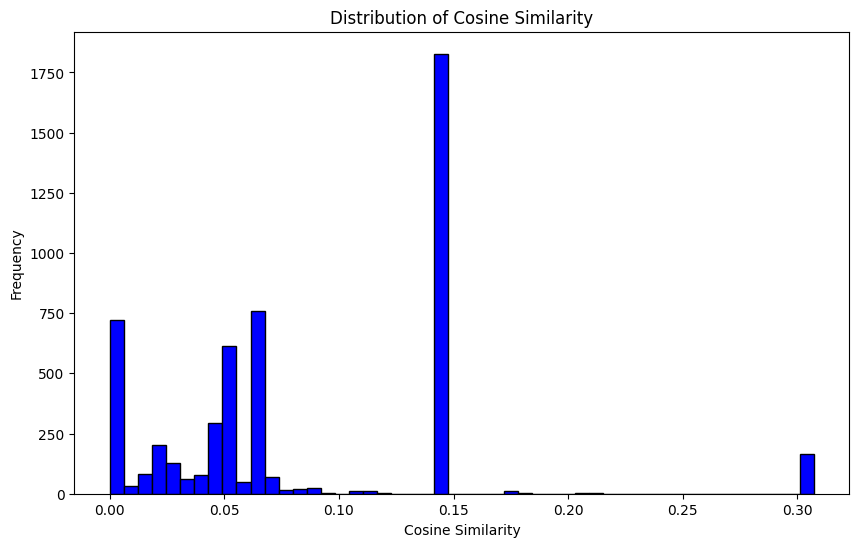

In [56]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['cosine_similarity'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Cosine Similarity')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()


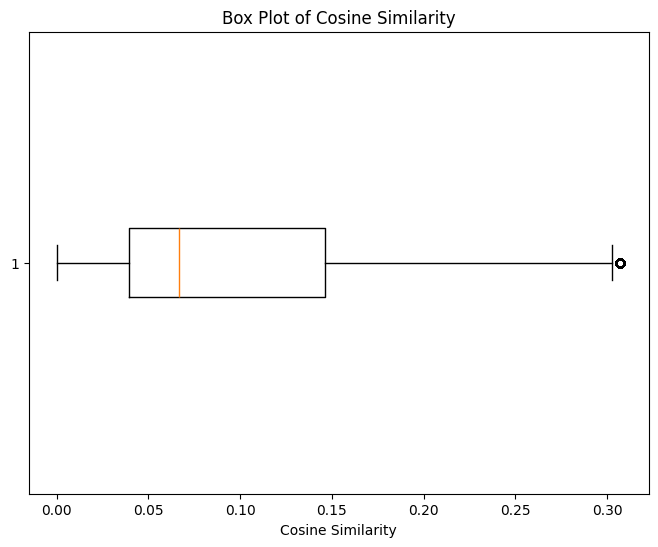

In [57]:
plt.figure(figsize=(8, 6))
plt.boxplot(data_cleaned['cosine_similarity'], vert=False)
plt.title('Box Plot of Cosine Similarity')
plt.xlabel('Cosine Similarity')
plt.show()


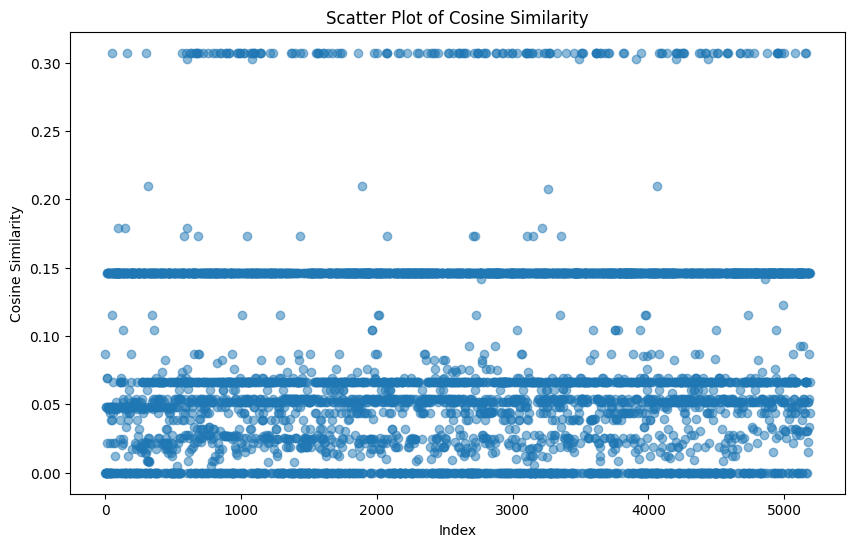

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data_cleaned)), data_cleaned['cosine_similarity'], alpha=0.5)
plt.title('Scatter Plot of Cosine Similarity')
plt.xlabel('Index')
plt.ylabel('Cosine Similarity')
plt.show()
